In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import re
from wordcloud import WordCloud, STOPWORDS

rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

In [ ]:
# 데이터 불러오기
review = pd.read_csv('data_all_0805_sentiment.csv', encoding='utf-8')

In [ ]:
# 데이터 개수 확인
review.shape

(6847, 7)

In [ ]:
# null 확인
review.isnull().sum()

브랜드          0
평점           0
피부타입         0
피부 고민        0
자극도          0
리뷰           0
sentiment    0
dtype: int64

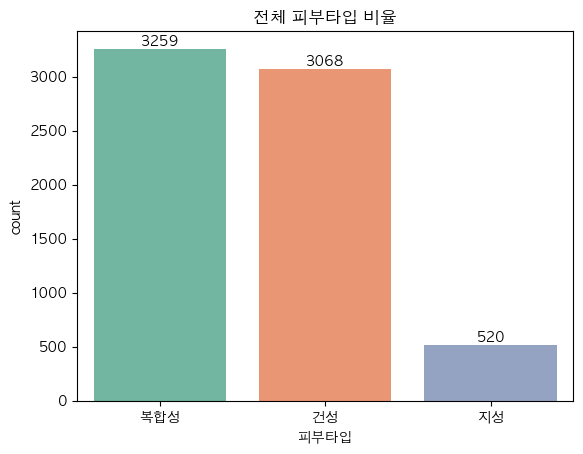

In [ ]:
# 전체 피부 타입 비율 확인

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

review['피부타입'] = review['피부타입'].replace({
    '복합성에 좋아요': '복합성',
    '건성에 좋아요': '건성',
    '지성에 좋아요': '지성'
})

ax = sns.countplot(x='피부타입', data=review, palette='Set2')
plt.title('전체 피부타입 비율')

# 수치 추가
total = len(review)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 30, '%d' % int(height), ha="center")

plt.show()

In [ ]:
# 각 브랜드별 피부타입 분포(수치 확인)
review.groupby(review['브랜드']).피부타입.count()

브랜드
AHC     1045
CNP      927
닥터지     1211
마녀공장    1069
아비브     1028
에스트라    1567
Name: 피부타입, dtype: int64

In [ ]:
# 각 브랜드별 피부타입 분포(수치 확인)
brand_skin_type = review.groupby(['브랜드', '피부타입']).size().unstack(fill_value=0)
brand_total = review.groupby('브랜드').size()
brand_skin_type['Total'] = brand_total
print(brand_skin_type)
plt.show()

피부타입   건성  복합성   지성  Total
브랜드                       
AHC   450  560   35   1045
CNP   500  383   44    927
닥터지   453  613  145   1211
마녀공장  364  621   84   1069
아비브   366  509  153   1028
에스트라  935  573   59   1567


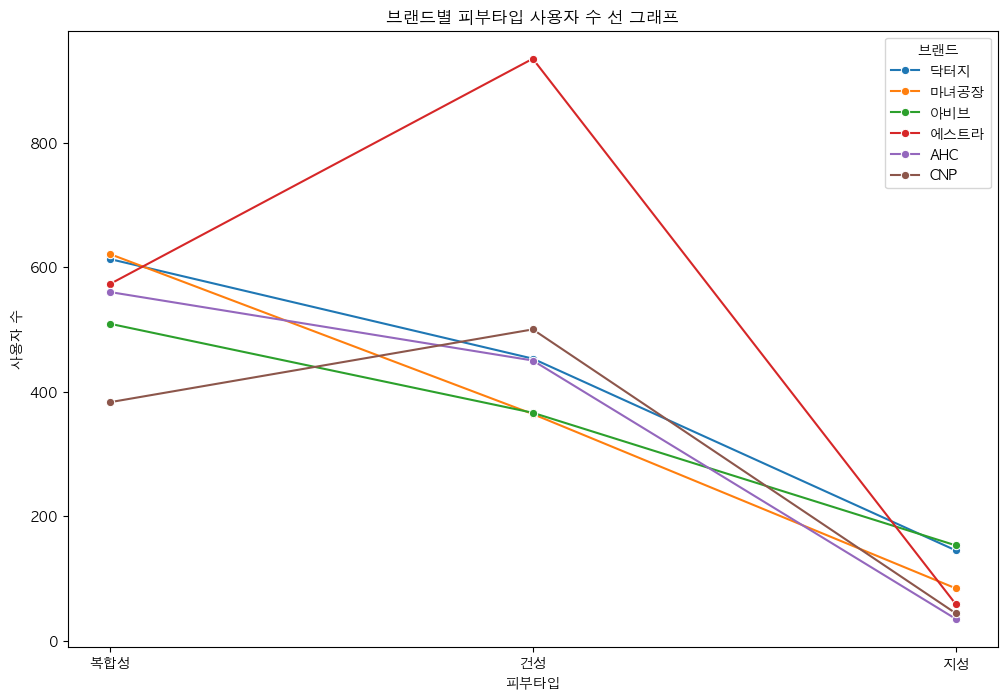

In [ ]:
# 브랜드 피부타입별 사용자 수 선 그래프
plt.figure(figsize=(12, 8))

brands = review['브랜드'].unique()
brands

for brand in brands:
    subset = review[review['브랜드'] == brand]
    count_data = subset['피부타입'].value_counts().reindex(['복합성', '건성', '지성'], fill_value=0).reset_index()
    count_data.columns = ['피부타입', '사용자']
    sns.lineplot(data=count_data, x='피부타입', y='사용자', label=brand, marker='o')
    # 그래프가 번지는 느낌이 보기에 별로 안좋은 것 같아서 'ci=None'을 추가했습니다.

plt.legend(title='브랜드')
plt.title('브랜드별 피부타입 사용자 수 선 그래프')
plt.xlabel('피부타입')
plt.ylabel('사용자 수')
plt.show()

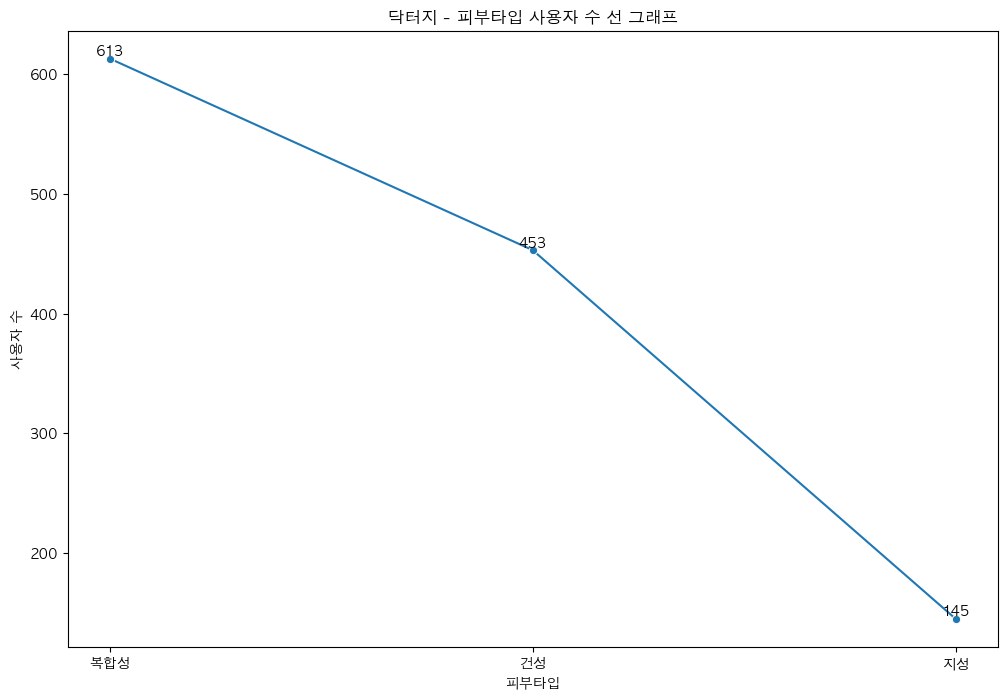

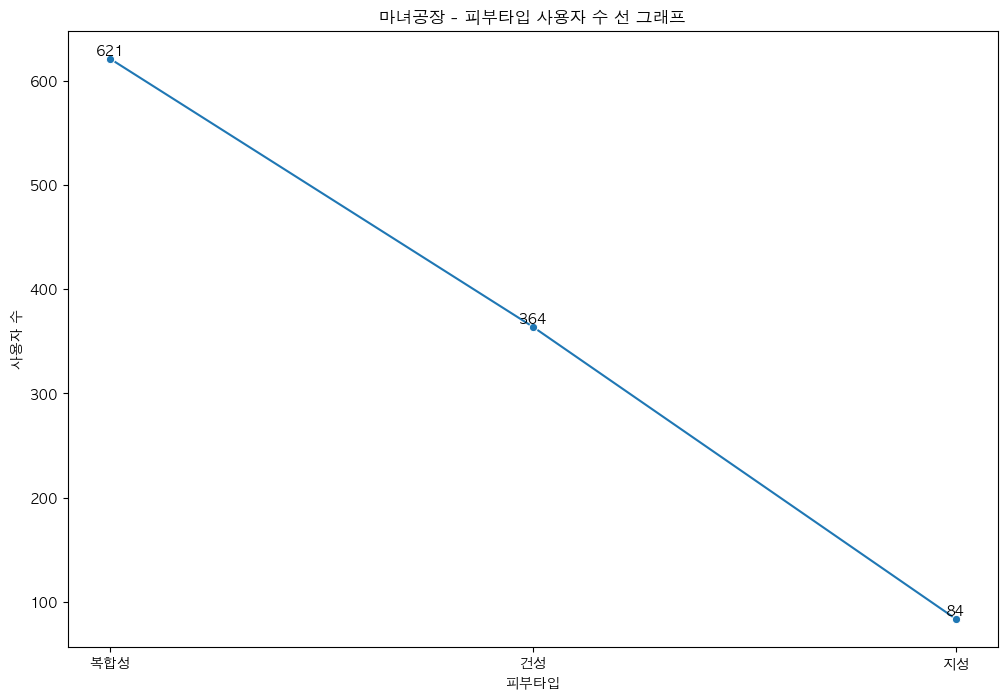

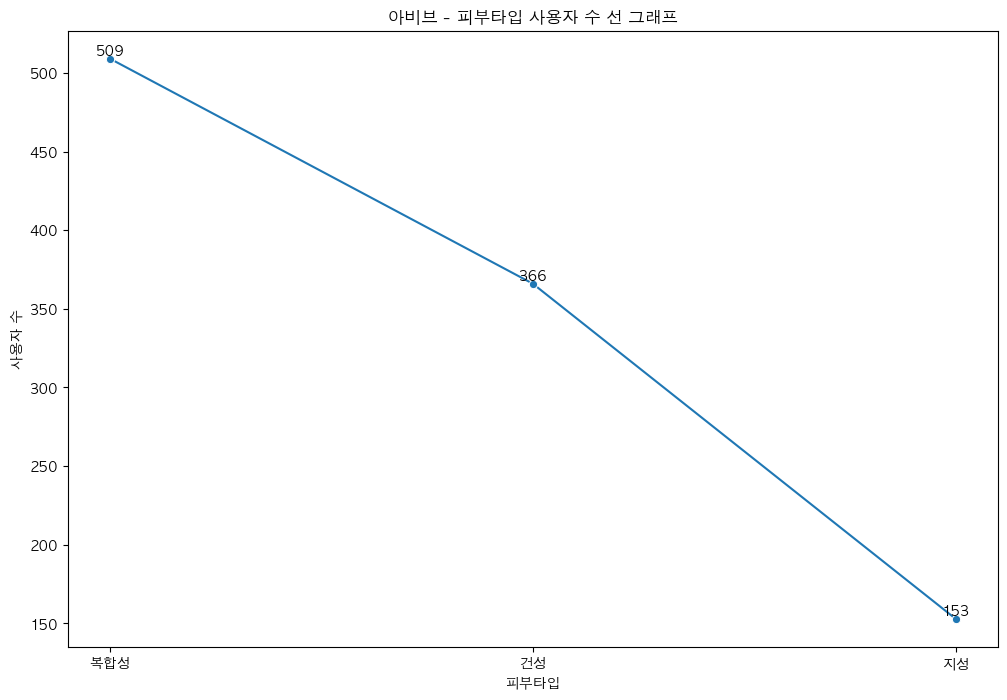

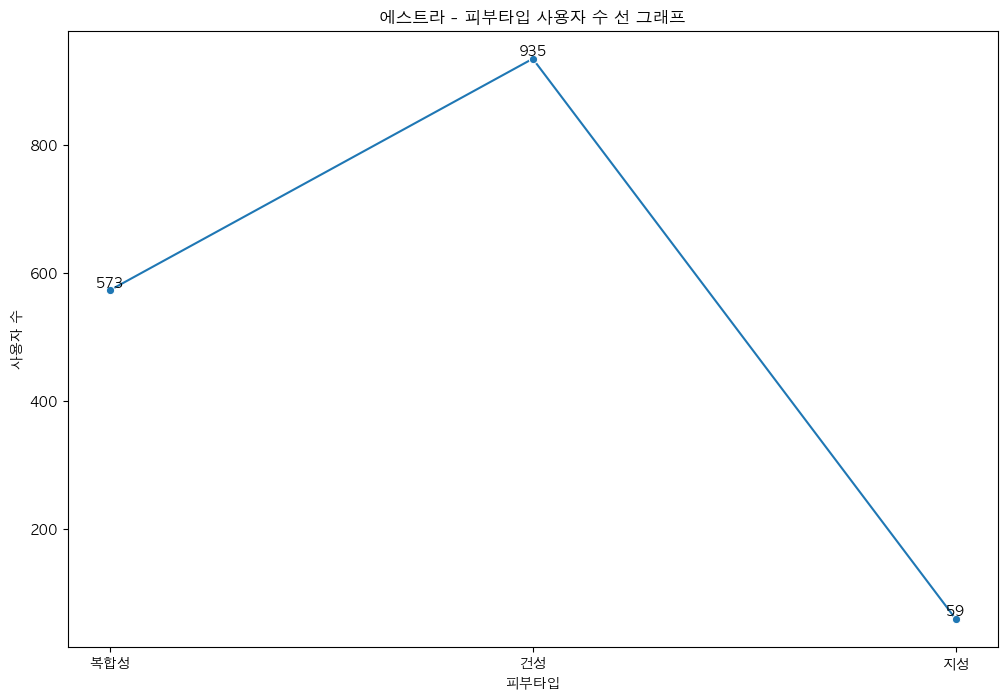

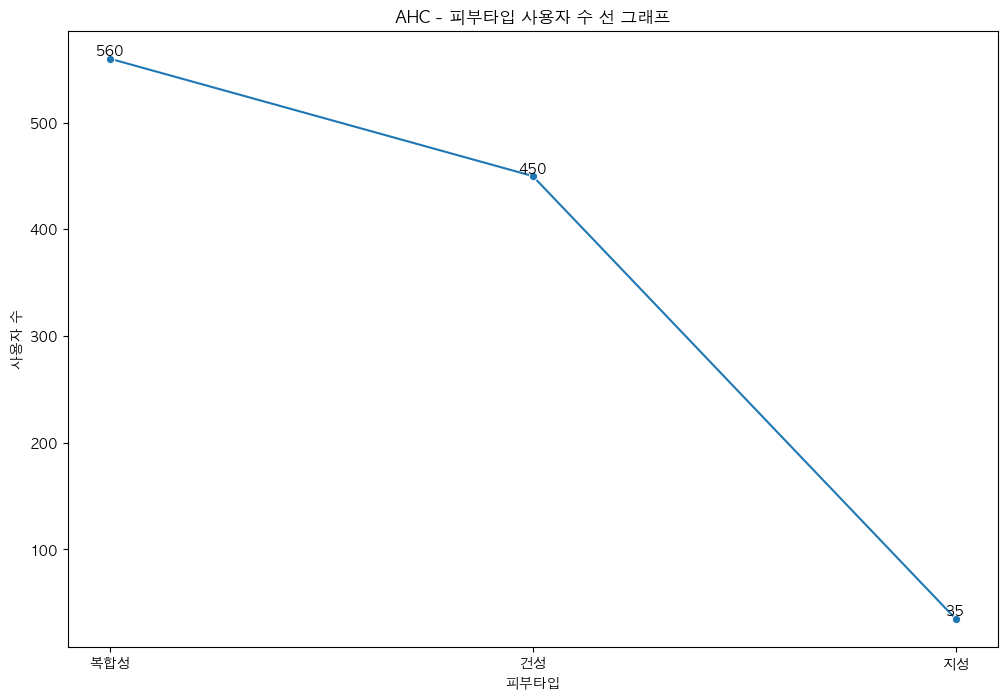

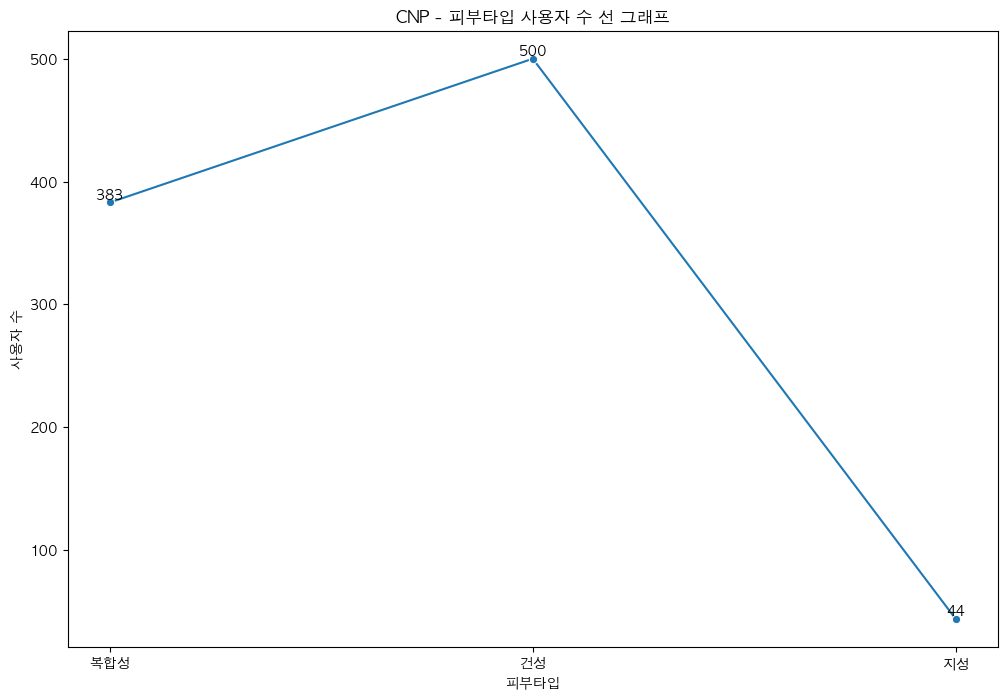

In [ ]:
# 각 브랜드별 피부타입을 개별 그래프로 표현
for brand in brands:
    plt.figure(figsize=(12, 8))
    subset = review[review['브랜드'] == brand]
    count_data = subset['피부타입'].value_counts().reindex(['복합성', '건성', '지성'], fill_value=0).reset_index()
    count_data.columns = ['피부타입', '사용자']
    sns.lineplot(data=count_data, x='피부타입', y='사용자', ci=None, marker='o')
    plt.title(f'{brand} - 피부타입 사용자 수 선 그래프')
    plt.xlabel('피부타입')
    plt.ylabel('사용자 수')

     # 꼭지점에 수치 표시
    for i, v in enumerate(count_data['사용자']):
        plt.text(i, v, str(v), ha='center', va='bottom')

    plt.show()

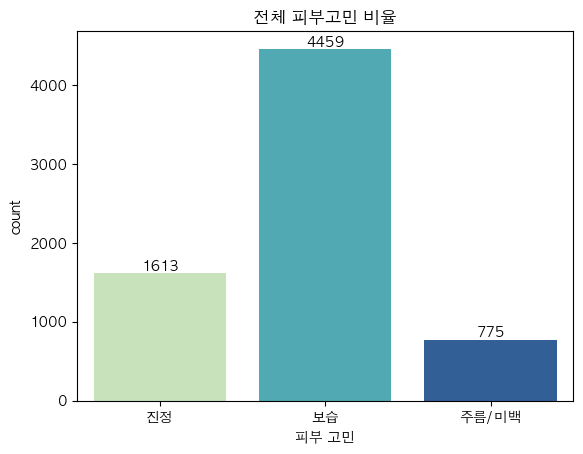

In [ ]:
# 전체 피부고민 비율 확인하기
review['피부 고민'] = review['피부 고민'].replace({
    '진정에 좋아요': '진정',
    '보습에 좋아요': '보습',
    '주름/미백에 좋아요': '주름/미백'
})

ax = sns.countplot(x='피부 고민', data=review, palette='YlGnBu')
plt.title('전체 피부고민 비율')

# 수치 추가
total = len(review)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 30, '%d' % int(height), ha="center")

plt.show()

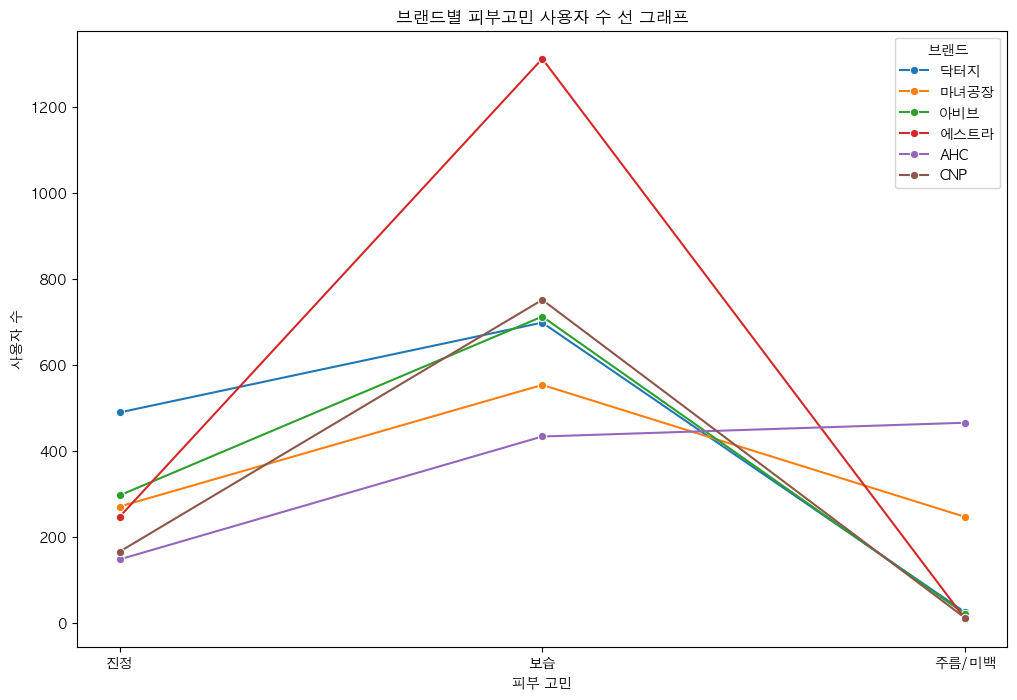

In [ ]:
# 브랜드 별 피부고민 확인하기
plt.figure(figsize=(12, 8))

for brand in brands:
    subset = review[review['브랜드'] == brand]
    count_data = subset['피부 고민'].value_counts().reindex(['진정', '보습', '주름/미백'], fill_value=0).reset_index()
    count_data.columns = ['피부 고민', '사용자']
    sns.lineplot(data=count_data, x='피부 고민', y='사용자', label=brand, ci=None, marker='o')

plt.legend(title='브랜드')
plt.title('브랜드별 피부고민 사용자 수 선 그래프')
plt.xlabel('피부 고민')
plt.ylabel('사용자 수')
plt.show()

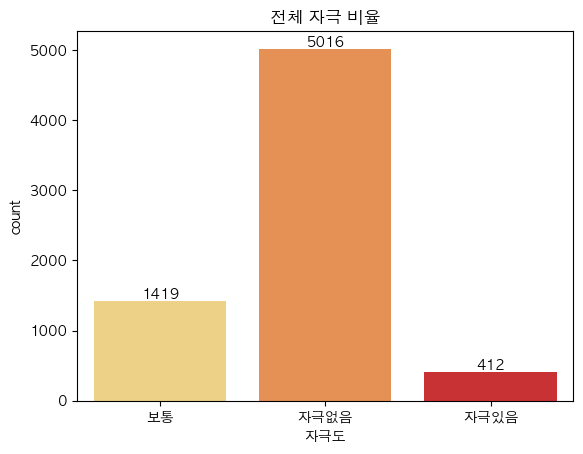

In [ ]:
# 전체 자극도 비율 확인하기
review['자극도'] = review['자극도'].replace({
    '보통이에요': '보통',
    '자극없이 순해요': '자극없음',
    '자극이 느껴져요': '자극있음'
})

ax = sns.countplot(x='자극도', data=review, palette='YlOrRd')
plt.title('전체 자극 비율')

# 수치 추가
total = len(review)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 30, '%d' % int(height), ha="center")

plt.show()

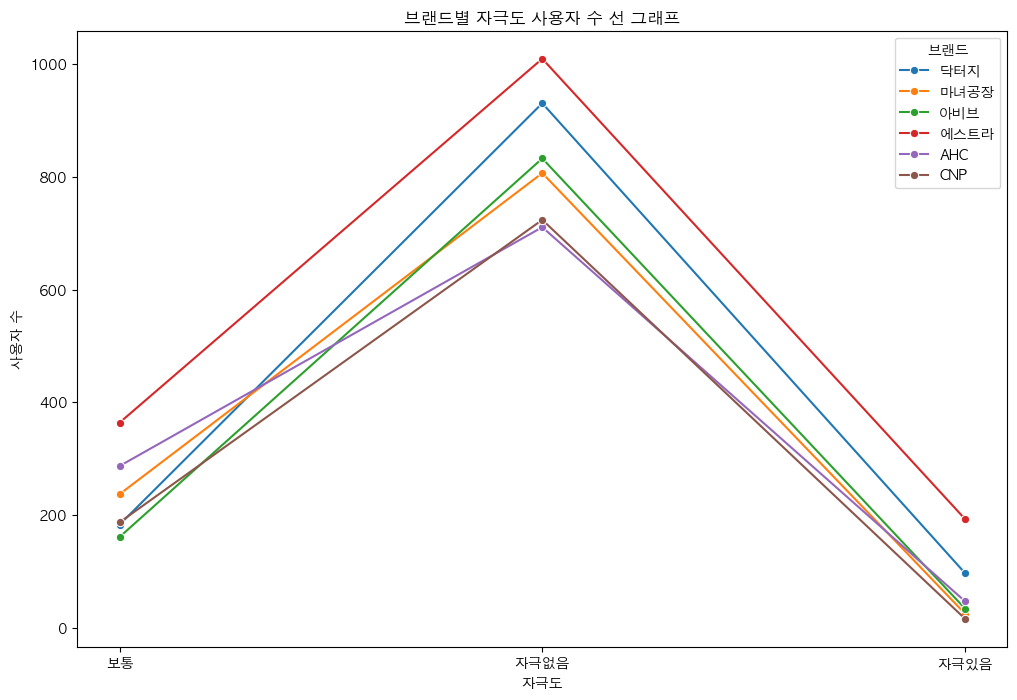

In [ ]:
# 브랜드 별 자극도 확인하기
plt.figure(figsize=(12, 8))

for brand in brands:
    subset = review[review['브랜드'] == brand]
    count_data = subset['자극도'].value_counts().reindex(['보통', '자극없음', '자극있음'], fill_value=0).reset_index()
    count_data.columns = ['자극도', '사용자']
    sns.lineplot(data=count_data, x='자극도', y='사용자', label=brand, ci=None, marker='o')

plt.legend(title='브랜드')
plt.title('브랜드별 자극도 사용자 수 선 그래프')
plt.xlabel('자극도')
plt.ylabel('사용자 수')
plt.show()

# 긍부정

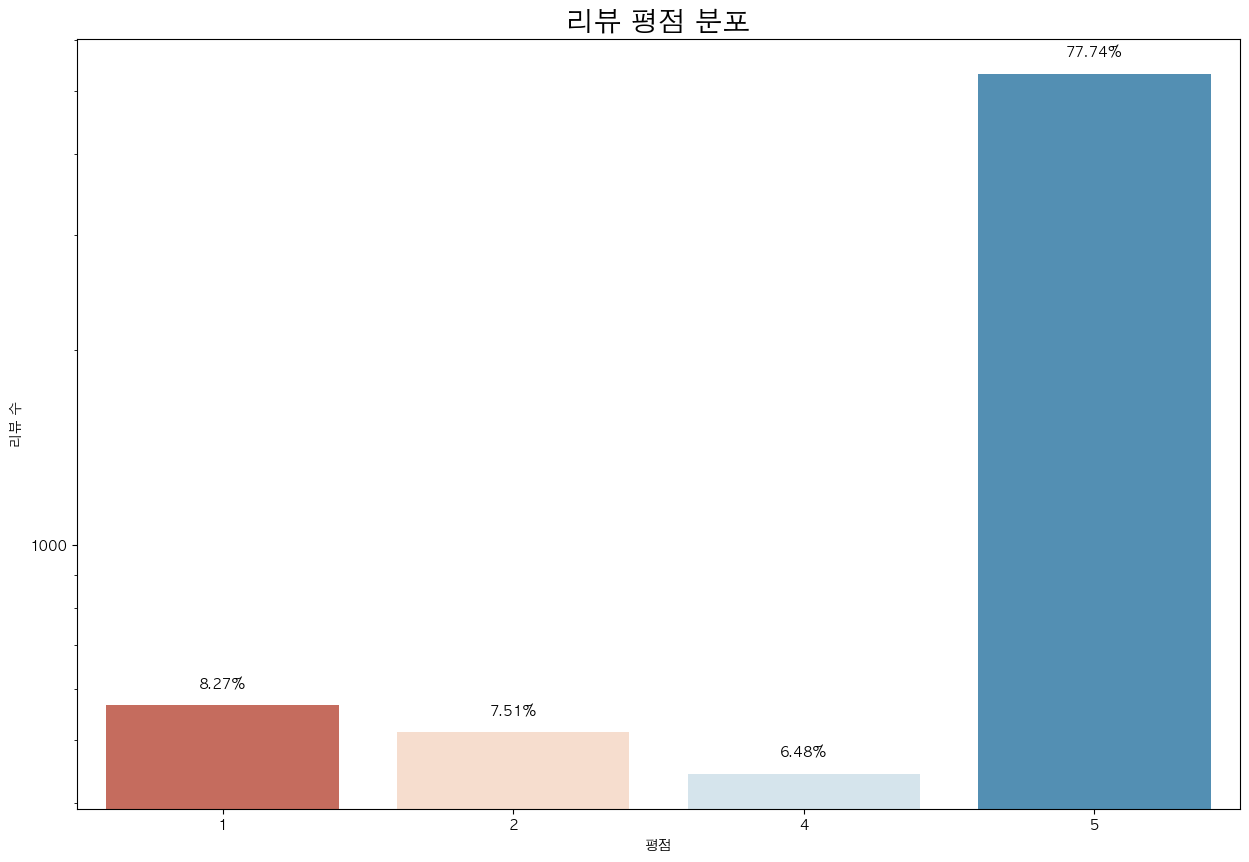

In [ ]:
# 부정데이터 추가 수집 후, 리뷰 데이터 평점 비율
rating_counts = review['평점'].value_counts().sort_index()
total_reviews = rating_counts.sum() # rating_counts(평점 길이)
rating_percentages = (rating_counts / total_reviews) * 100 # 백분율 계산 코드 ((평점 개수/평점 길이)*100)
plt.figure(figsize=(15, 10))
ax = sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='RdBu')

plt.yscale('log')
plt.title('리뷰 평점 분포', size=20)
plt.xlabel('평점')
plt.ylabel('리뷰 수')

ax.yaxis.set_major_formatter(plt.ScalarFormatter())  # y축 값의 포맷을 일반적인 숫자 형식으로 표시

# 각 막대의 상단에 퍼센트 표시
for p, percentage in zip(ax.patches, rating_percentages):
    height = p.get_height()
    ax.annotate(f'{percentage:.2f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                xytext=(0, 10),
                textcoords='offset points')

plt.show()

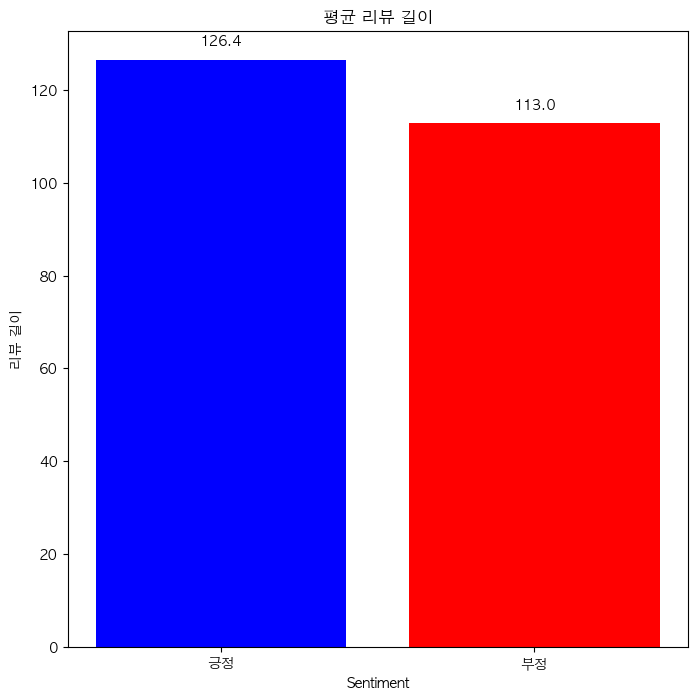

In [ ]:
import matplotlib.pyplot as plt

# 시각화
plt.figure(figsize=(8, 8))

bars = plt.bar(['긍정', '부정'], [length_sentiment_1, length_sentiment_0], color=['blue', 'red'])

plt.title('평균 리뷰 길이')
plt.ylabel('리뷰 길이')
plt.xlabel('Sentiment')

# 수치 표시
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        # 텍스트 위치 조정
        plt.text(rect.get_x() + rect.get_width()/2., height + 0.02 * height,
                '%0.1f' % float(height),
                ha='center', va='bottom')

autolabel(bars)

plt.show()

In [ ]:
print('부정 리뷰 길이 :', length_sentiment_0)
print('긍정 리뷰 길이 :', length_sentiment_1)

부정 리뷰 길이 : 112.95648148148148
긍정 리뷰 길이 : 126.43974336743541


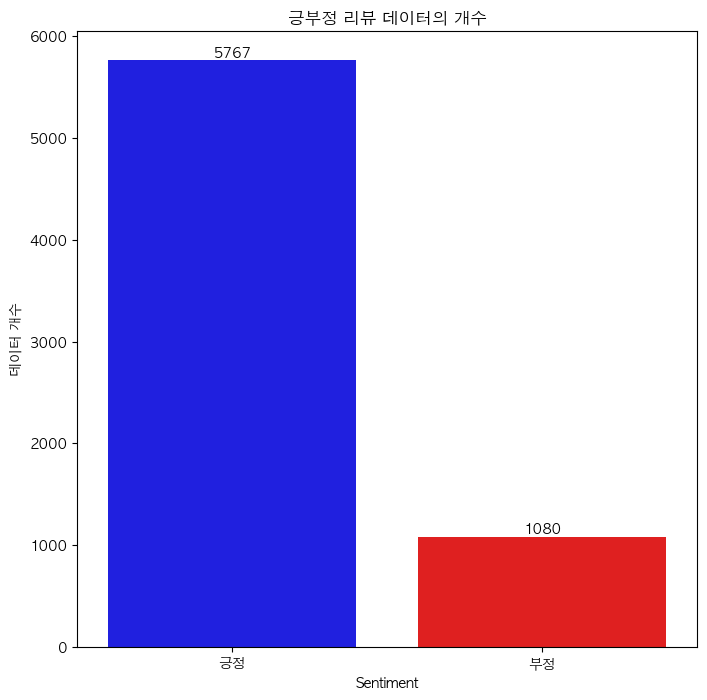

In [ ]:
# 긍부정 리뷰 데이터의 개수
# 부정이 0, 긍정이 1 => 그래프에 적용
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(8,8)

# 데이터프레임의 컬럼 이름 변경
review = review.replace({'sentiment': {0: '부정', 1: '긍정'}})

ax = sns.countplot(x='sentiment', data=review, ax=axe, palette={'부정': 'red', '긍정': 'blue'})
axe.set_title('긍부정 리뷰 데이터의 개수')
axe.set_xlabel('Sentiment')
axe.set_ylabel('데이터 개수')

# 수치 추가
total = len(review)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 30, '%d' % int(height), ha="center")

plt.show()

In [ ]:
print('긍정 리뷰 개수 : {}'.format(review['sentiment'].value_counts()[1]))
print('부정 리뷰 개수 : {}'.format(review['sentiment'].value_counts()[0]))

긍정 리뷰 개수 : 1080
부정 리뷰 개수 : 5767


In [ ]:
# 긍부정 데이터의 비율
print('긍정 리뷰 : ', round(review['sentiment'].value_counts()[1]/len(review) * 100, 3), '%')
print('부정 리뷰 : ', round(review['sentiment'].value_counts()[0]/len(review) * 100, 3), '%')

긍정 리뷰 :  15.773 %
부정 리뷰 :  84.227 %


# 불용어 제거 후 워드클라우드
(코드랑 워드클라우드 이미지만 옮기고 코드 실행은 안했습니다!)

In [ ]:
file = open('Korean Stopwords.txt', 'r', encoding='utf-8')
stop_str = file.read()
print(f'파일 내용 : {stop_str}')
file.close()

파일 내용 : 아
휴
아이구
아이쿠
아이고
어
나
우리
저희
따라
의해
을
를
에
의
가
으로
로
에게
뿐이다
의거하여
근거하여
입각하여
기준으로
예하면
예를 들면
예를 들자면
저
소인
소생
저희
지말고
하지마
하지마라
다른
물론
또한
그리고
비길수 없다
해서는 안된다
뿐만 아니라
만이 아니다
만은 아니다
막론하고
관계없이
그치지 않다
그러나
그런데
하지만
든간에
논하지 않다
따지지 않다
설사
비록
더라도
아니면
만 못하다
하는 편이 낫다
불문하고
향하여
향해서
향하다
쪽으로
틈타
이용하여
타다
오르다
제외하고
이 외에
이 밖에
하여야
비로소
한다면 몰라도
외에도
이곳
여기
부터
기점으로
따라서
할 생각이다
하려고하다
이리하여
그리하여
그렇게 함으로써
하지만
일때
할때
앞에서
중에서
보는데서
으로써
로써
까지
해야한다
일것이다
반드시
할줄알다
할수있다
할수있어
임에 틀림없다
한다면
등
등등
제
겨우
단지
다만
할뿐
딩동
댕그
대해서
대하여
대하면
훨씬
얼마나
얼마만큼
얼마큼
남짓
여
얼마간
약간
다소
좀
조금
다수
몇
얼마
지만
하물며
또한
그러나
그렇지만
하지만
이외에도
대해 말하자면
뿐이다
다음에
반대로
반대로 말하자면
이와 반대로
바꾸어서 말하면
바꾸어서 한다면
만약
그렇지않으면
까악
툭
딱
삐걱거리다
보드득
비걱거리다
꽈당
응당
해야한다
에 가서
각
각각
여러분
각종
각자
제각기
하도록하다
와
과
그러므로
그래서
고로
한 까닭에
하기 때문에
거니와
이지만
대하여
관하여
관한
과연
실로
아니나다를가
생각한대로
진짜로
한적이있다
하곤하였다
하
하하
허허
아하
거바
와
오
왜
어째서
무엇때문에
어찌
하겠는가
무슨
어디
어느곳
더군다나
하물며
더욱이는
어느때
언제
야
이봐
어이
여보시오
흐흐
흥
휴
헉헉
헐떡헐떡
영차
여차
어기여차
끙끙
아야
앗
아야
콸콸
졸졸
좍좍
뚝뚝
주룩주룩
솨
우르르
그래도
또
그리고
바꾸어말하면
바꾸어말하자면
혹은
혹시
답다
및
그에 따르는
때가 되어
즉
지든지
설령
가령
하더라도
할지라도
일지라도
지든지
몇
거의
하마터면
인젠
이젠

In [ ]:
f = open('긍정데이터_감정추가,불용어제거.csv', 'r', encoding='cp949')
lines = csv.reader(f)
header = next(lines)
print(header)
f.close()

pos_review_word = pd.read_csv('긍정데이터_감정추가,불용어제거.csv', encoding='cp949')
pos_review_word.tail()

In [ ]:
f = open('부정데이터_감정추가,불용어제거.csv', 'r', encoding='cp949')
lines = csv.reader(f)
header = next(lines)
print(header)
f.close()

neg_review_word = pd.read_csv('부정데이터_감정추가,불용어제거.csv', encoding='cp949')
neg_review_word.tail()

In [ ]:
# 워드클라우드

from wordcloud import WordCloud, STOPWORDS
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 한글 폰트 설정

# 긍정 리뷰 워드클라우드

plt.figure(figsize=(12,12))
wc = WordCloud(font_path=font_path, max_words = 1000, width = 800, height=800).generate(' '.join(pos_review_word.Column1))
plt.imshow(wc)
plt.axis('off')
plt.show()

![image.png](attachment:ed4f9319-499e-4ff3-a556-27acfc2e2515.png)

In [ ]:
# 부정 리뷰 워드클라우드
plt.figure(figsize=(12,12))
wc = WordCloud(font_path=font_path, max_words = 1000, width = 800, height=800).generate(' '.join(neg_review_word.Column1))
plt.imshow(wc)
plt.axis('off')
plt.show()

![image.png](attachment:00be5bf0-fa19-4492-91d7-d64ef3725dff.png)

# 긍부정 가장 많이 나오는 단어 추출

In [ ]:
positive_review = review[review['sentiment']==1].리뷰
positive_tokens = []
for i in positive_review:
    tokens = i.split()
    tokens = [word for word in tokens if not word in stop_str]
    cleaned_text = " ".join(tokens)
    positive_tokens.append(cleaned_text)

negative_review = review[review['sentiment']==0].리뷰
negative_tokens = []
for i in negative_review:
    tokens = i.split()
    tokens = [word for word in tokens if not word in stop_str]
    cleaned_text = " ".join(tokens)
    negative_tokens.append(cleaned_text)

In [ ]:
# 단어 분리
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words

corpus_pos = get_corpus(positive_tokens)
corpus_neg = get_corpus(negative_tokens)

In [ ]:
# 긍정 리뷰에는 어떤 단어가 많이 나오는가?
from collections import Counter

counter = Counter(corpus_pos)
most_common = counter.most_common(10)
dict(most_common)

{}

In [ ]:
# 부정 리뷰에는 어떤 단어가 많이 나오는가?
from collections import Counter

counter = Counter(corpus_neg)
most_common = counter.most_common(10)
dict(most_common)

{}

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_text_ngrams(corpus, n, g): # n : 상위 몇 개를 뽑을 것인지, g : n-gram(단어 몇 개를 연결할 것인지)
    vec = CountVectorizer(ngram_range=(g,g)).fit(corpus) # n-gram_range : (g,g) : g-그램(g 길이의 n-gram)을 생성, fit : corpus를 학습
    bag_of_words = vec.transform(corpus) # corpus를 vec의 n-gram의 출현 빈도수를 가진 행렬 반환
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()] # 단어, 빈도수 리스트
    words_freq = sorted(words_freq, key = lambda x : x[1], reverse = True) # 내림차순 정렬
    return words_freq[:n] # 상위 n개의 g_gram 리스트

In [ ]:
# 긍정 리뷰 한 글자
plt.figure(figsize=(16,9))
most_common_uni = get_top_text_ngrams(corpus_pos, 10, 1) # 1 unigram으로 처리 -> 1개의 단어를 기준으로 작업을 해주겠다.
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()), y=list(most_common_uni.keys()))

In [ ]:
# 부정 리뷰 한 글자
plt.figure(figsize=(16,9))
most_common_uni = get_top_text_ngrams(corpus_neg, 10, 1) # 1 unigram으로 처리 -> 1개의 단어를 기준으로 작업을 해주겠다.
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()), y=list(most_common_uni.keys()))

# 브랜드별로 많이 나오는 단어 시각화
(불용어 추가 제거하여 워드클라우드 및 단어 막대그래프)

In [ ]:
# 한글 폰트 설정 (경로를 실제 설치된 한글 폰트로 변경해야 함)
font_path = '/Library/Fonts/AppleGothic.ttf'

In [ ]:
# 불용어 파일 불러오는 코드 추가
file = open('Korean Stopwords.txt', 'r', encoding='utf-8')
stop_str = file.read()
file.close()

In [ ]:
# 브랜드 별 불용어제거 돌리기
review_drg = review[review['브랜드']=='닥터지'].리뷰
word_drg = []
for i in review_drg:
    tokens = i.split()
    tokens = [word for word in tokens if not word in stop_str]
    cleaned_text = " ".join(tokens)
    word_drg.append(cleaned_text)

review_aestura = review[review['브랜드']=='에스트라'].리뷰
word_aestura = []
for i in review_aestura:
    tokens = i.split()
    tokens = [word for word in tokens if not word in stop_str]
    cleaned_text = " ".join(tokens)
    word_aestura.append(cleaned_text)

review_abib = review[review['브랜드']=='아비브'].리뷰
word_abib = []
for i in review_abib:
    tokens = i.split()
    tokens = [word for word in tokens if not word in stop_str]
    cleaned_text = " ".join(tokens)
    word_abib.append(cleaned_text)

review_cnp = review[review['브랜드']=='CNP'].리뷰
word_cnp = []
for i in review_cnp:
    tokens = i.split()
    tokens = [word for word in tokens if not word in stop_str]
    cleaned_text = " ".join(tokens)
    word_cnp.append(cleaned_text)

review_mngj = review[review['브랜드']=='마녀공장'].리뷰
word_mngj = []
for i in review_mngj:
    tokens = i.split()
    tokens = [word for word in tokens if not word in stop_str]
    cleaned_text = " ".join(tokens)
    word_mngj.append(cleaned_text)

review_AHC = review[review['브랜드']=='AHC'].리뷰
word_AHC = []
for i in review_AHC:
    tokens = i.split()
    tokens = [word for word in tokens if not word in stop_str]
    cleaned_text = " ".join(tokens)
    word_AHC.append(cleaned_text)

In [ ]:
# 단어 분리
corpus_drg = get_corpus(word_drg)
corpus_aestura = get_corpus(word_aestura)
corpus_abib = get_corpus(word_abib)
corpus_cnp = get_corpus(word_cnp)
corpus_mngj = get_corpus(word_mngj)
corpus_AHC = get_corpus(word_AHC)

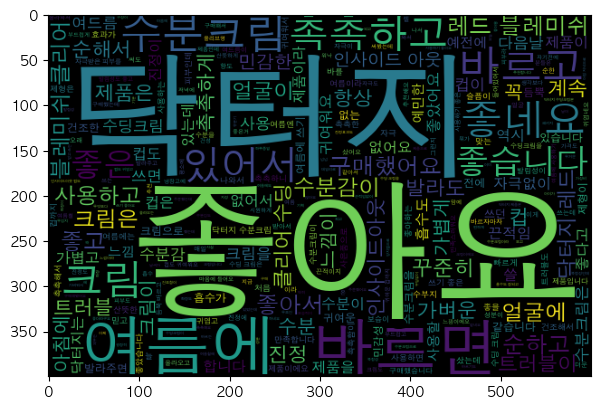

In [ ]:
# 닥터지
review['브랜드'] = review['브랜드'].astype(str)
plt.figure(figsize=(7,7))
wc = WordCloud(font_path=font_path, max_words = 1000, width = 600, height=400).generate(' '.join(word_drg))
plt.imshow(wc)

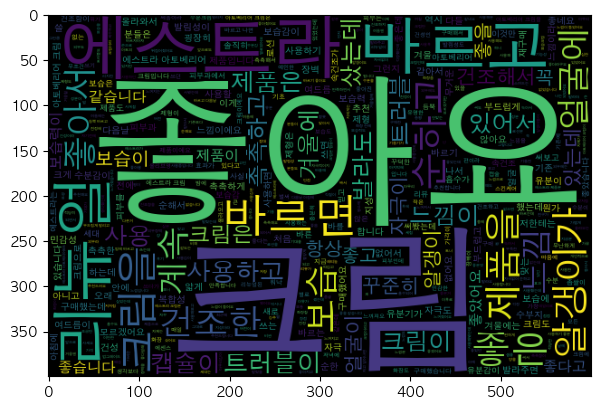

In [ ]:
# 에스트라
review['브랜드'] = review['브랜드'].astype(str)
plt.figure(figsize=(7,7))
wc = WordCloud(font_path=font_path, max_words = 1000, width = 600, height=400).generate(' '.join(word_aestura))
plt.imshow(wc)

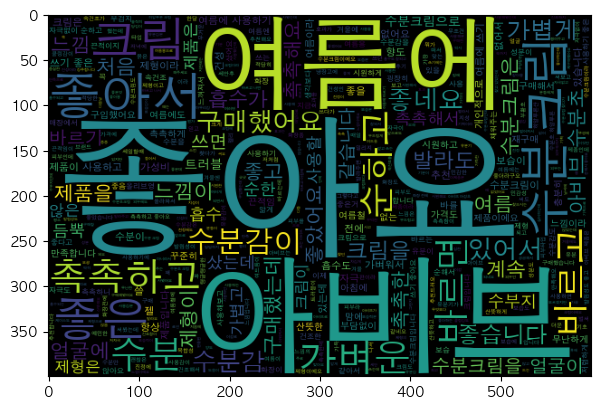

In [ ]:
# 아비브
review['브랜드'] = review['브랜드'].astype(str)
plt.figure(figsize=(7,7))
wc = WordCloud(font_path=font_path, max_words = 1000, width = 600, height=400).generate(' '.join(word_abib))
plt.imshow(wc)

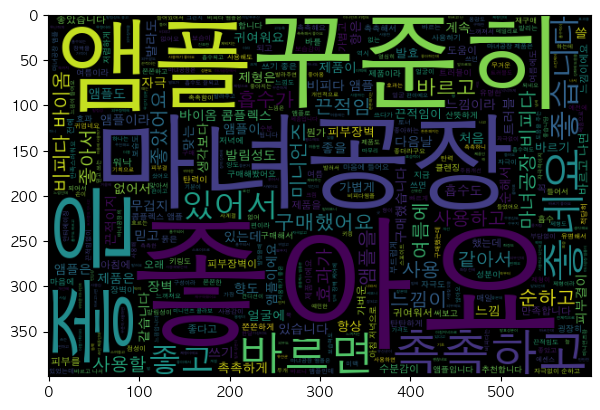

In [ ]:
# 마녀공장
review['브랜드'] = review['브랜드'].astype(str)
plt.figure(figsize=(7,7))
wc = WordCloud(font_path=font_path, max_words = 1000, width = 600, height=400).generate(' '.join(word_mngj))
plt.imshow(wc)

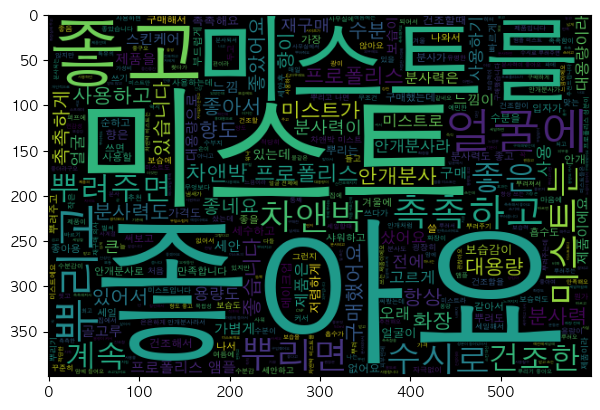

In [ ]:
# CNP
review['브랜드'] = review['브랜드'].astype(str)
plt.figure(figsize=(7,7))
wc = WordCloud(font_path=font_path, max_words = 1000, width = 600, height=400).generate(' '.join(word_cnp))
plt.imshow(wc)

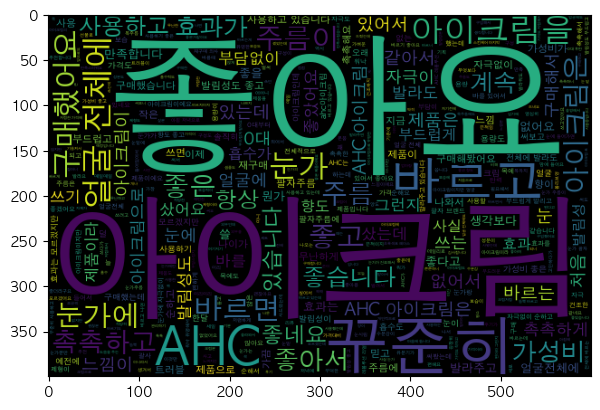

In [ ]:
# AHC
review['브랜드'] = review['브랜드'].astype(str)
plt.figure(figsize=(7,7))
wc = WordCloud(font_path=font_path, max_words = 1000, width = 600, height=400).generate(' '.join(word_AHC))
plt.imshow(wc)

<Axes: >

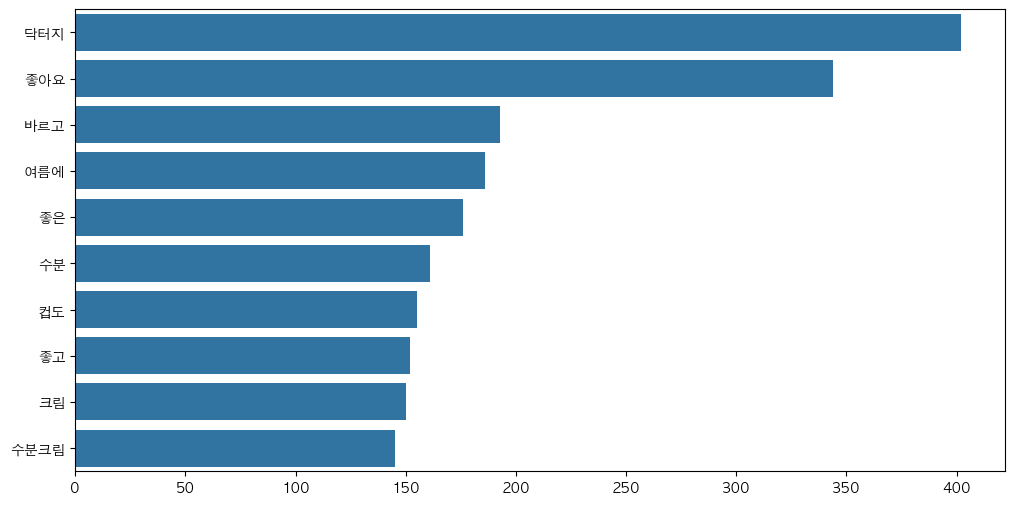

In [ ]:
# 닥터지 리뷰 한 글자
plt.figure(figsize=(12,6))
most_common_uni = get_top_text_ngrams(corpus_drg, 10, 1) # 1 unigram으로 처리 -> 1개의 단어를 기준으로 작업을 해주겠다.
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()), y=list(most_common_uni.keys()))

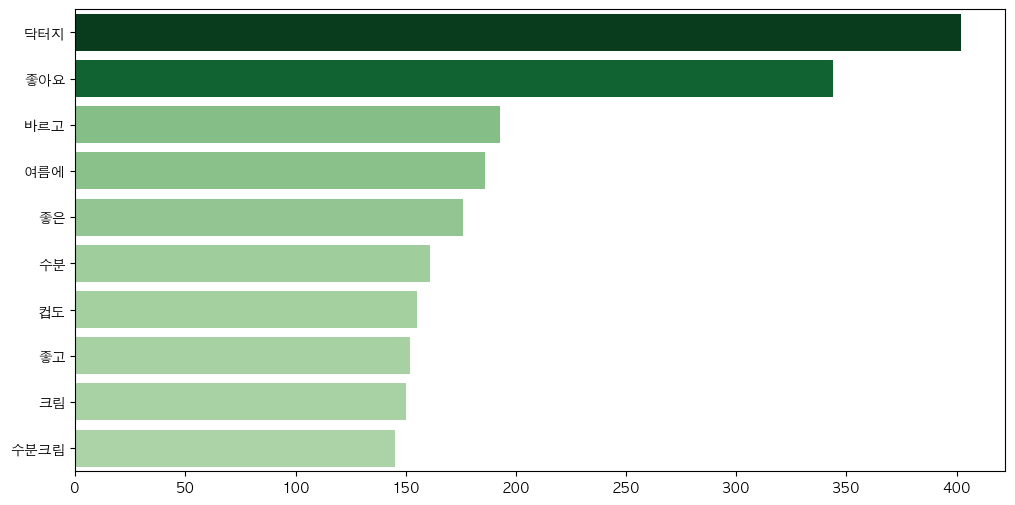

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12,6))
most_common_uni = get_top_text_ngrams(corpus_drg, 10, 1)
most_common_uni = dict(most_common_uni)
normalized_values = np.array(list(most_common_uni.values())) / max(most_common_uni.values())

palette = sns.color_palette("Greens", as_cmap=True)

colors = palette(normalized_values)

sns.barplot(x=list(most_common_uni.values()), y=list(most_common_uni.keys()), palette=colors)
plt.show()

<Axes: >

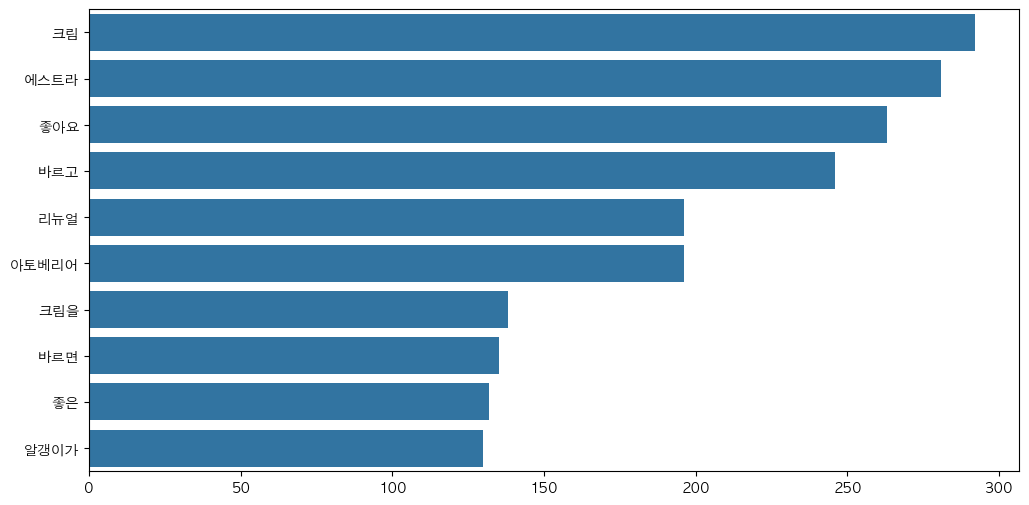

In [ ]:
# 에스트라 리뷰 한 글자
plt.figure(figsize=(12,6))
most_common_uni = get_top_text_ngrams(corpus_aestura, 10, 1) # 1 unigram으로 처리 -> 1개의 단어를 기준으로 작업을 해주겠다.
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()), y=list(most_common_uni.keys()))

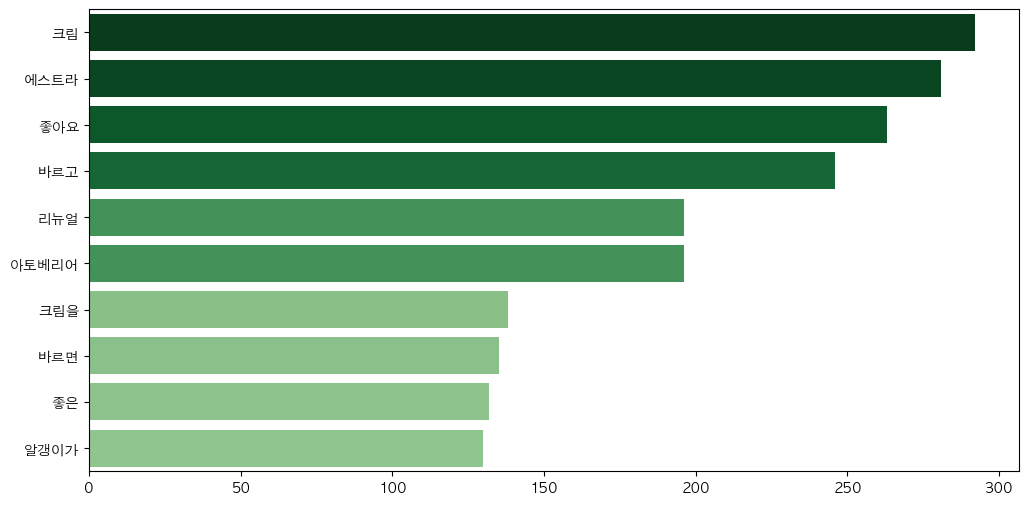

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12,6))
most_common_uni = get_top_text_ngrams(corpus_aestura, 10, 1)
most_common_uni = dict(most_common_uni)
normalized_values = np.array(list(most_common_uni.values())) / max(most_common_uni.values())

palette = sns.color_palette("Greens", as_cmap=True)

colors = palette(normalized_values)

sns.barplot(x=list(most_common_uni.values()), y=list(most_common_uni.keys()), palette=colors)
plt.show()

<Axes: >

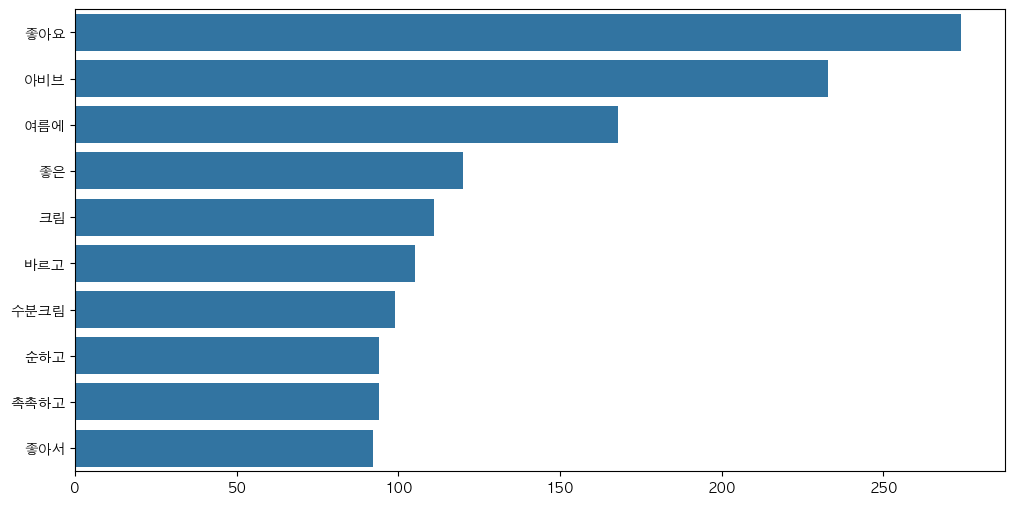

In [ ]:
# 아비브 리뷰 한 글자
plt.figure(figsize=(12,6))
most_common_uni = get_top_text_ngrams(corpus_abib, 10, 1) # 1 unigram으로 처리 -> 1개의 단어를 기준으로 작업을 해주겠다.
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()), y=list(most_common_uni.keys()))

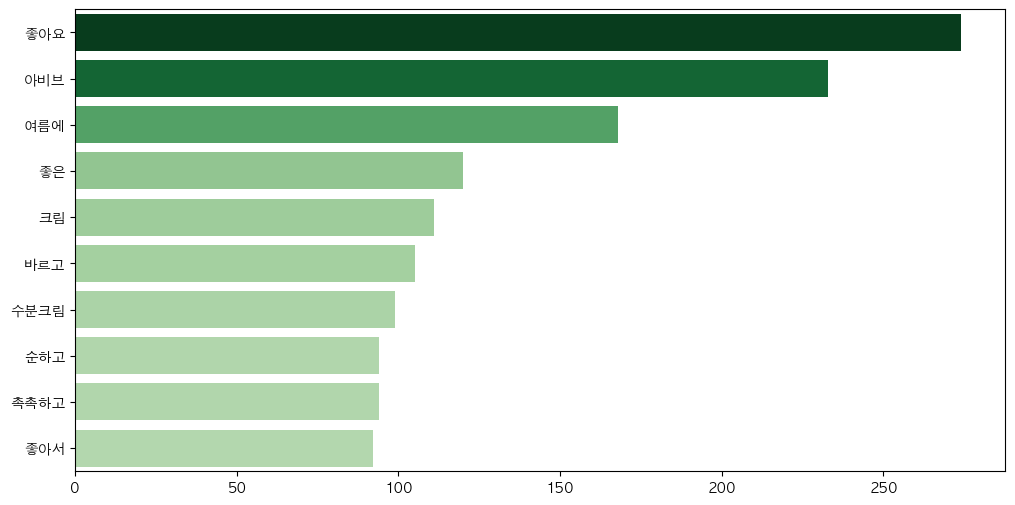

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12,6))
most_common_uni = get_top_text_ngrams(corpus_abib, 10, 1)
most_common_uni = dict(most_common_uni)
normalized_values = np.array(list(most_common_uni.values())) / max(most_common_uni.values())

palette = sns.color_palette("Greens", as_cmap=True)

colors = palette(normalized_values)

sns.barplot(x=list(most_common_uni.values()), y=list(most_common_uni.keys()), palette=colors)
plt.show()

<Axes: >

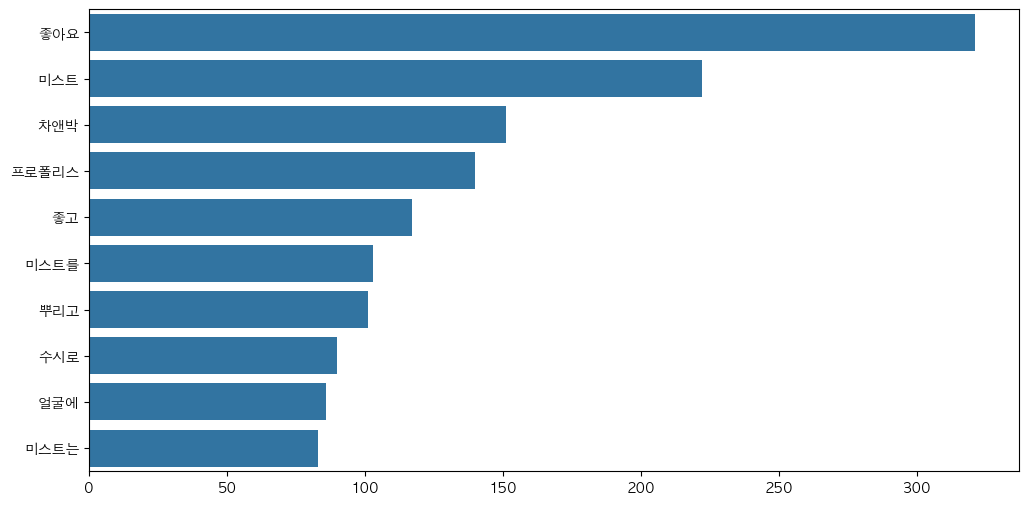

In [ ]:
# 차앤박 리뷰 한 글자
plt.figure(figsize=(12,6))
most_common_uni = get_top_text_ngrams(corpus_cnp, 10, 1) # 1 unigram으로 처리 -> 1개의 단어를 기준으로 작업을 해주겠다.
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()), y=list(most_common_uni.keys()))

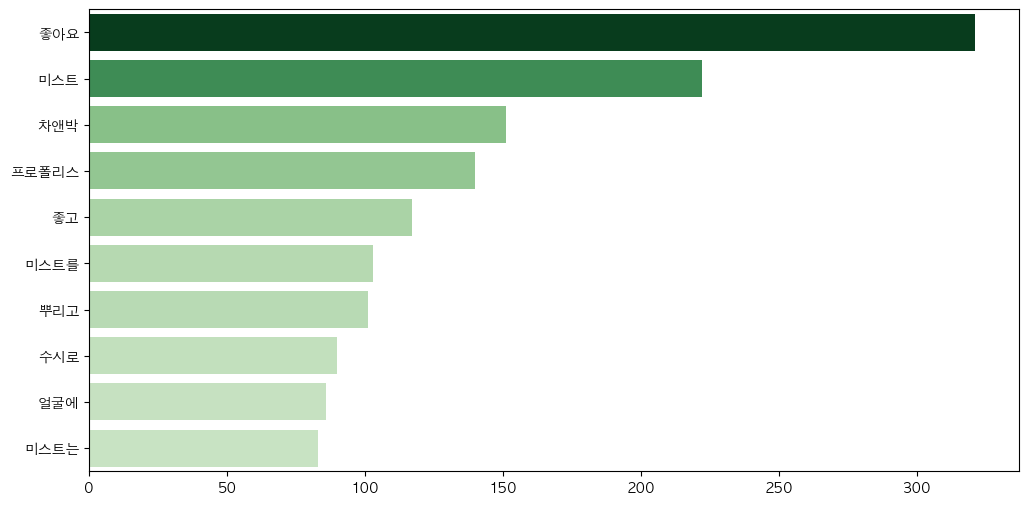

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12,6))
most_common_uni = get_top_text_ngrams(corpus_cnp, 10, 1)
most_common_uni = dict(most_common_uni)
normalized_values = np.array(list(most_common_uni.values())) / max(most_common_uni.values())

palette = sns.color_palette("Greens", as_cmap=True)

colors = palette(normalized_values)

sns.barplot(x=list(most_common_uni.values()), y=list(most_common_uni.keys()), palette=colors)
plt.show()

<Axes: >

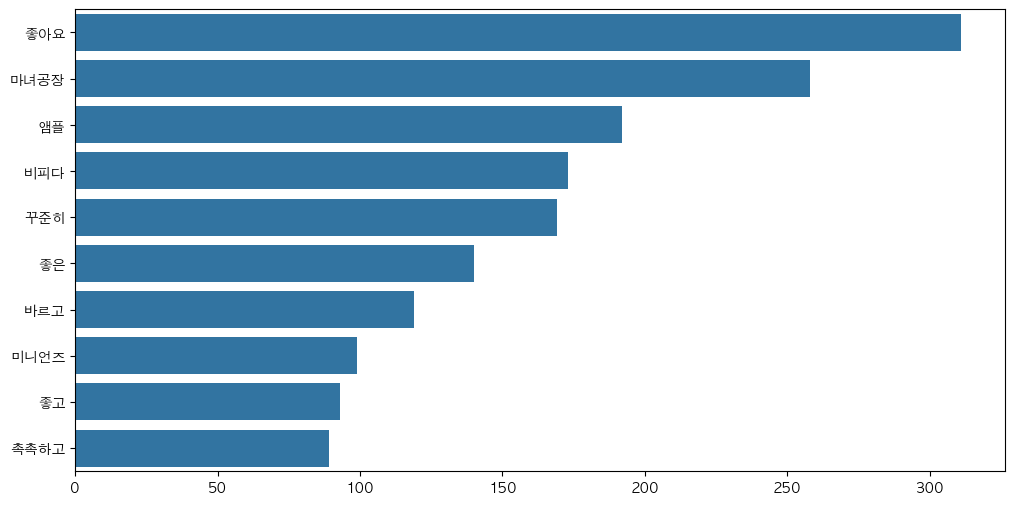

In [ ]:
# 마녀공장리뷰 한 글자
plt.figure(figsize=(12,6))
most_common_uni = get_top_text_ngrams(corpus_mngj, 10, 1) # 1 unigram으로 처리 -> 1개의 단어를 기준으로 작업을 해주겠다.
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()), y=list(most_common_uni.keys()))

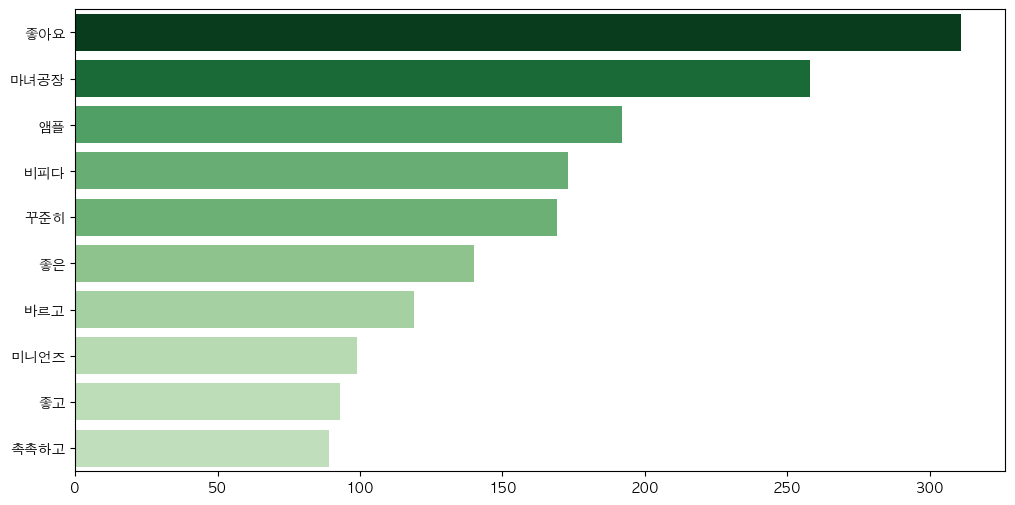

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12,6))
most_common_uni = get_top_text_ngrams(corpus_mngj, 10, 1)
most_common_uni = dict(most_common_uni)
normalized_values = np.array(list(most_common_uni.values())) / max(most_common_uni.values())

palette = sns.color_palette("Greens", as_cmap=True)

colors = palette(normalized_values)

sns.barplot(x=list(most_common_uni.values()), y=list(most_common_uni.keys()), palette=colors)
plt.show()

<Axes: >

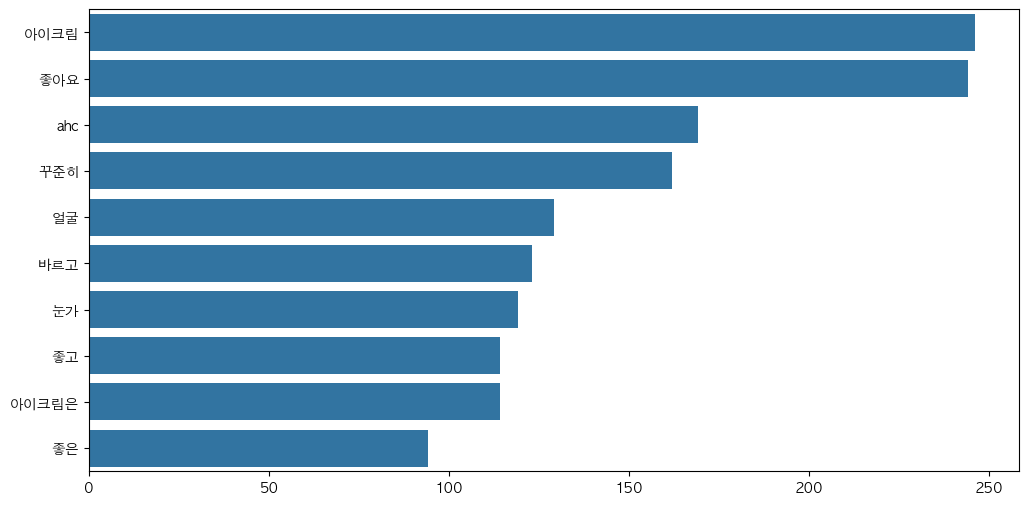

In [ ]:
# AHC 리뷰 한 글자
plt.figure(figsize=(12,6))
most_common_uni = get_top_text_ngrams(corpus_AHC, 10, 1) # 1 unigram으로 처리 -> 1개의 단어를 기준으로 작업을 해주겠다.
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()), y=list(most_common_uni.keys()))

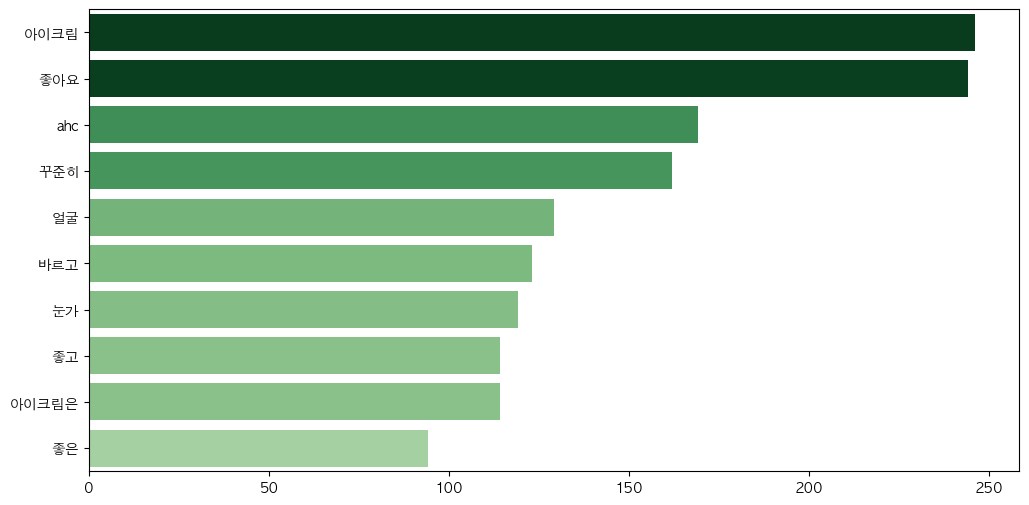

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12,6))
most_common_uni = get_top_text_ngrams(corpus_AHC, 10, 1)
most_common_uni = dict(most_common_uni)
normalized_values = np.array(list(most_common_uni.values())) / max(most_common_uni.values())

palette = sns.color_palette("Greens", as_cmap=True)

colors = palette(normalized_values)

sns.barplot(x=list(most_common_uni.values()), y=list(most_common_uni.keys()), palette=colors)
plt.show()